# Process BayeScan outlier test
Outlier analysis performed on 10kb thinned kin-removed data
```bash
BayeScan2.1 $1 \
	-o bft_bscan \
	-n 15000 \
	-pilot 15000 \
	-burn 100000 \
	-pr_odds 100 \
	-threads $2 \
```

## Setup environment

In [4]:
library(coda)

#### Plot function provided by Bayescan

In [2]:
plot_bayescan<-function(res,FDR=0.05,size=1,pos=0.35,highlight=NULL,name_highlighted=F,add_text=T){
    if (is.character(res))
    res=read.table(res)

    colfstat=5
    colq=colfstat-2

    highlight_rows=which(is.element(as.numeric(row.names(res)),highlight))
    non_highlight_rows=setdiff(1:nrow(res),highlight_rows)

    outliers=as.integer(row.names(res[res[,colq]<=FDR,]))

    ok_outliers=TRUE
    if (sum(res[,colq]<=FDR)==0)
        ok_outliers=FALSE;

    res[res[,colq]<=0.0001,colq]=0.0001

    # plot
    plot(log10(res[,colq]),res[,colfstat],xlim=rev(range(log10(res[,colq]))),xlab="log10(q value)",ylab=names(res[colfstat]),type="n")
    points(log10(res[non_highlight_rows,colq]),res[non_highlight_rows,colfstat],pch=19,cex=size)

    if (name_highlighted) {
        if (length(highlight_rows)>0) {
            text(log10(res[highlight_rows,colq]),res[highlight_rows,colfstat],row.names(res[highlight_rows,]),col="red",cex=size*1.2,font=2)
        }
    }
    else {
        points(log10(res[highlight_rows,colq]),res[highlight_rows,colfstat],col="red",pch=19,cex=size)
        # add names of loci over p and vertical line
        if (ok_outliers & add_text) {
            text(log10(res[res[,colq]<=FDR,][,colq])+pos*(round(runif(nrow(res[res[,colq]<=FDR,]),1,2))*2-3),res[res[,colq]<=FDR,][,colfstat],row.names(res[res[,colq]<=FDR,]),cex=size)
        }
    }
    lines(c(log10(FDR),log10(FDR)),c(-1,1),lwd=2)

    return(list("outliers"=outliers,"nb_outliers"=length(outliers)))
}

Import files

In [6]:
bft_bscan_fst <- read.csv("bft_kinless_bscan_fst.txt", sep="")
locinames <- readLines("../../inputfiles/snp.names")

## Check Convergence

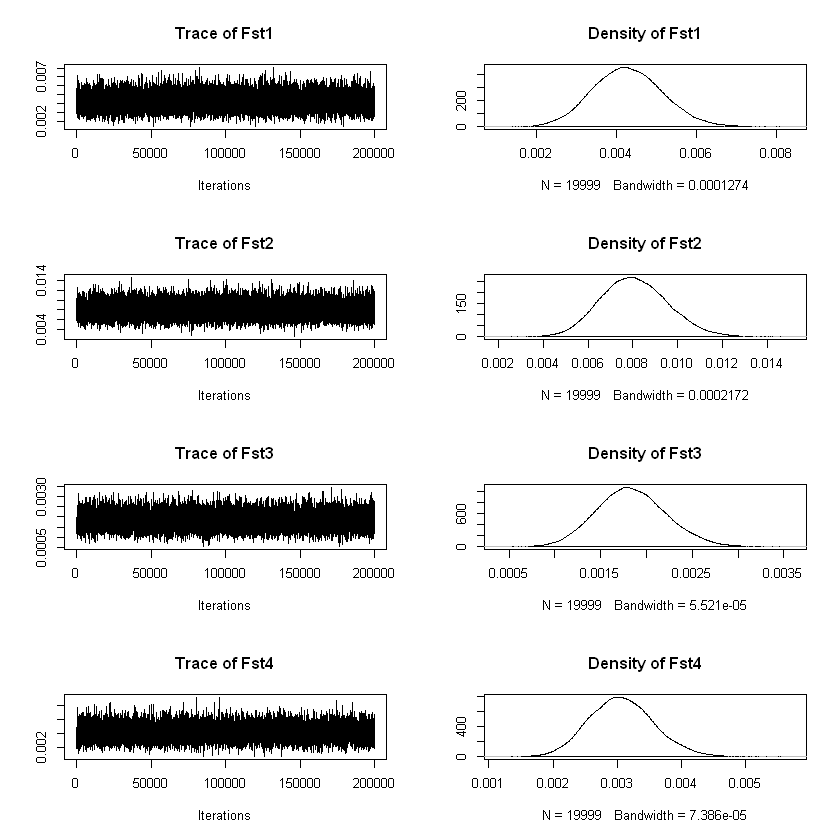

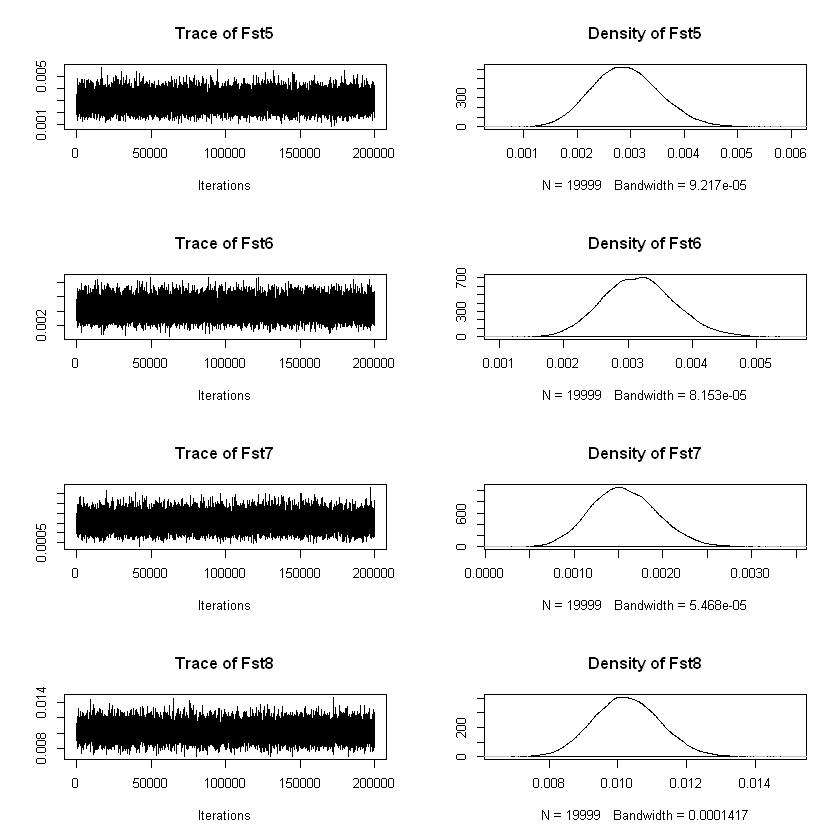

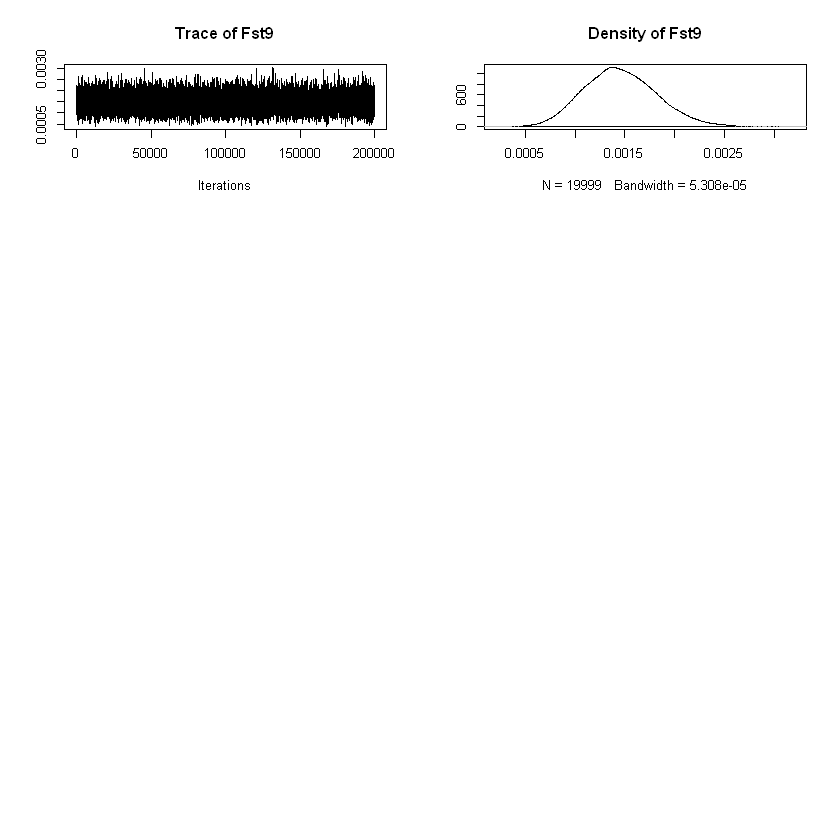

In [7]:
chain <- read.table("bft_kinless_bscan.sel", header = TRUE)
chain <- chain[-c(1)]
mc_chain <- mcmc(chain, thin = 10)
plot(mc_chain)

In [8]:
autocorr.diag(mc_chain)

,Fst1,Fst2,Fst3,Fst4,Fst5,Fst6,Fst7,Fst8,Fst9
Lag 0,1.000000000,1.000000000,1.000000000,1.0000000000,1.000000000,1.0000000000,1.000000e+00,1.0000000000,1.000000000
Lag 10,0.058334341,0.038503555,0.141804684,0.1075318345,0.077334869,0.0934101001,1.126746e-01,0.1638176093,0.077801409
Lag 50,0.013468405,0.005436989,0.016126078,-0.0003848721,0.008648361,-0.0144677590,-1.487297e-02,-0.0007811128,-0.006252416
Lag 100,0.009199875,-0.007296549,0.001089709,-0.0086928731,-0.009799318,0.0002830685,3.612489e-05,-0.0001998342,0.002483786
Lag 500,-0.001808507,-0.009856026,-0.004040493,0.0091912435,0.008981081,0.0135393355,-1.518602e-03,0.0007836853,0.009670579


In [9]:
effectiveSize(mc_chain)

Fst1     Fst2     Fst3     Fst4     Fst5     Fst6     Fst7     Fst8 
17793.46 19402.69 14569.88 16114.73 17126.95 16690.65 15947.82 14368.21 
    Fst9 
17110.88

In [10]:
geweke.diag(mc_chain, frac1 = 0.1, frac2 = 0.5)


Fraction in 1st window = 0.1
Fraction in 2nd window = 0.5 

    Fst1     Fst2     Fst3     Fst4     Fst5     Fst6     Fst7     Fst8 
-1.24709 -1.54953  0.66400  2.00950 -0.74439 -1.30524 -0.06447  0.98973 
    Fst9 
 0.31319 


In [11]:
heidel.diag(mc_chain, eps=0.1, pvalue = 0.05)

                                   
     Stationarity start     p-value
     test         iteration        
Fst1 passed          1      0.509  
Fst2 passed          1      0.251  
Fst3 passed          1      0.299  
Fst4 passed       2001      0.178  
Fst5 passed          1      0.860  
Fst6 passed          1      0.491  
Fst7 passed          1      0.640  
Fst8 passed          1      0.824  
Fst9 passed          1      0.552  
                                
     Halfwidth Mean    Halfwidth
     test                       
Fst1 passed    0.00429 1.28e-05 
Fst2 passed    0.00807 2.09e-05 
Fst3 passed    0.00184 6.18e-06 
Fst4 passed    0.00307 8.24e-06 
Fst5 passed    0.00292 9.44e-06 
Fst6 passed    0.00317 8.46e-06 
Fst7 passed    0.00157 5.80e-06 
Fst8 passed    0.01026 1.58e-05 
Fst9 passed    0.00146 5.44e-06 

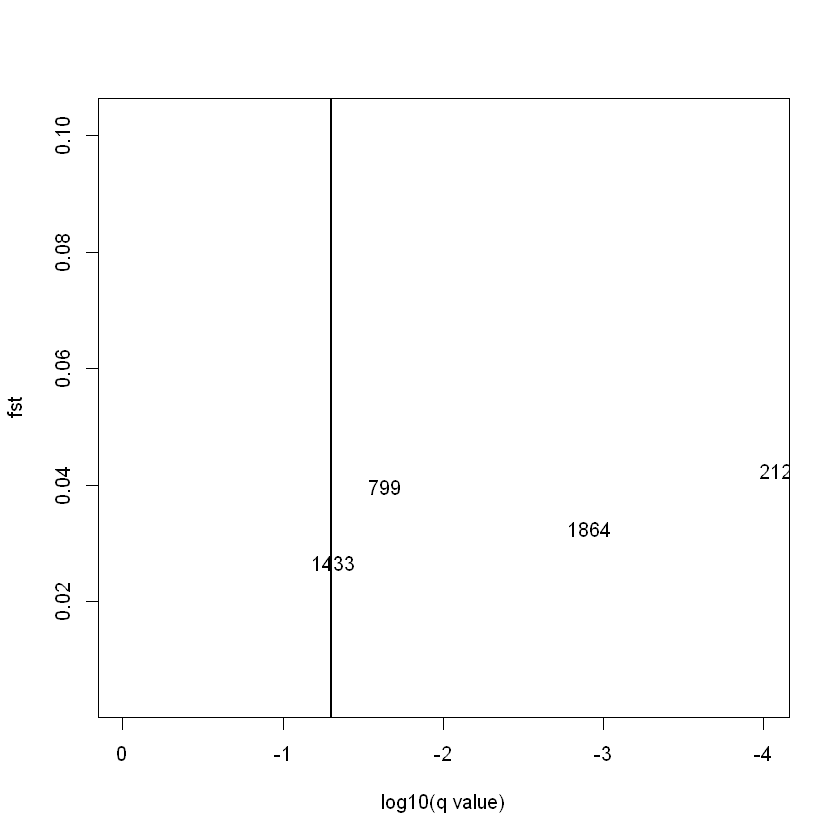

In [13]:
plt <- plot_bayescan("bft_kinless_bscan_fst.txt",0,FDR=0.05)

In [14]:
outliers <- bft_bscan_fst[bft_bscan_fst$qval<=0.05,]
outliers

,prob,log10.PO.,qval,alpha,fst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
799,0.96695,1.4662,0.01032600,2.1391,0.039769
1433,0.93260,1.1410,0.02174100,1.7037,0.026812
1864,0.99210,2.0989,0.00275010,1.9434,0.032515
2129,0.99965,3.4558,0.00017501,2.2712,0.042567
2130,1.00000,1000.0000,0.00000000,3.3169,0.102430


In [17]:
cat(locinames[as.numeric(rownames(outliers))], file = "bayescan.outliers.loci", sep = "\n")
write.csv(outliers, file = "bayescan.csv", row.names = F, col.names = F, quote = F)

Warning message in write.csv(outliers, file = "bayescan.csv", row.names = F, col.names = F, :
"attempt to set 'col.names' ignored"
